In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from kerasy.utils import generateSin
from kerasy.utils import root_mean_squared_error

In [3]:
seed = 1
xmin,xmax=(0,1)
N = 10
X = np.linspace(xmin, xmax, 100)
Y = np.sin(2*np.pi*X)

In [4]:
train_x, train_y = generateSin(N, xmin=xmin, xmax=xmax, seed=seed)

## Linear Regression

In [5]:
from kerasy.ML.linear import LinearRegression

In [6]:
Ms = [2,4,6,8]

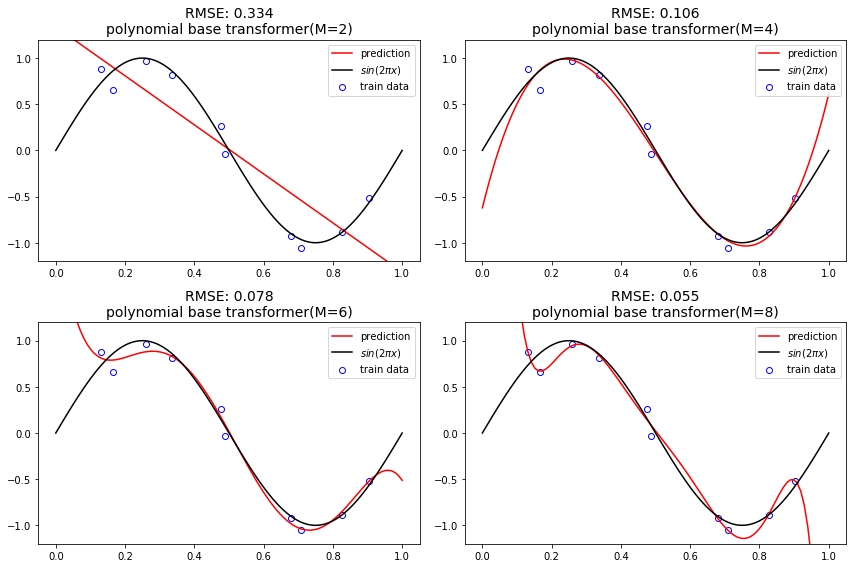

In [7]:
fig=plt.figure(figsize=(12,8))
for i,M in enumerate(Ms):
    ax=fig.add_subplot(2,2,i+1)
    # Training.
    model = LinearRegression(basis="polynomial", exponent=range(1,M))
    model.fit(train_x,train_y)
    # Plot
    ax.plot(X, model.predict(X),  color="red", label="prediction")
    ax.plot(X, Y,                 color="black", label="$sin(2\pi x)$")
    ax.scatter(train_x, train_y, edgecolors='blue',facecolor="white",label="train data")
    ax.set_title(f"RMSE: {root_mean_squared_error(model.predict(train_x), train_y):.3f}\npolynomial base transformer(M={M})", fontsize=14)
    ax.set_ylim(-1.2,1.2)
    ax.legend()
plt.tight_layout()
plt.show()

In [8]:
Normalmodel = model

## Linear Regression (Ridge Regularization L2)

In [9]:
from kerasy.ML.linear import LinearRegressionRidge

In [10]:
lambda_ = 1e-3

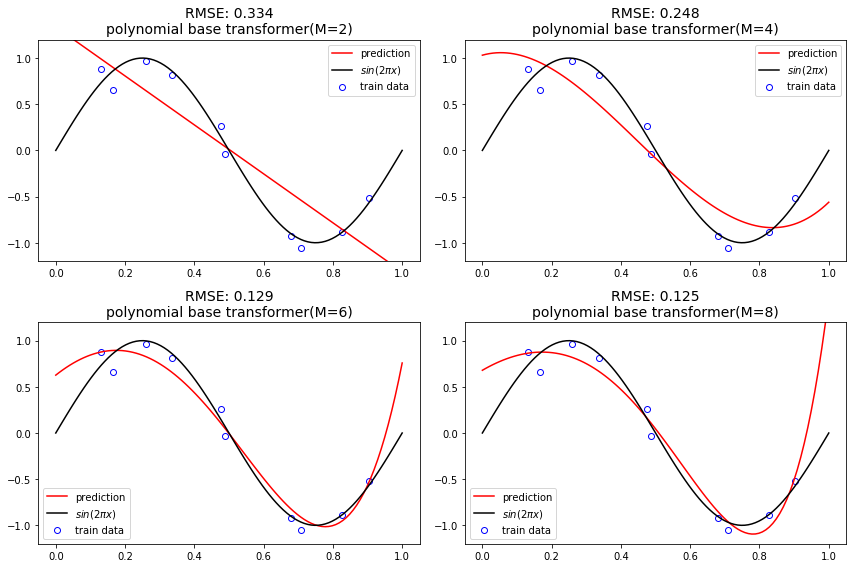

In [11]:
fig=plt.figure(figsize=(12,8))
for i,M in enumerate(Ms):
    ax=fig.add_subplot(2,2,i+1)
    # Training.
    model = LinearRegressionRidge(lambda_, basis="polynomial", exponent=range(1,M))
    model.fit(train_x,train_y)
    # Plot
    ax.plot(X, model.predict(X),  color="red", label="prediction")
    ax.plot(X, Y,                 color="black", label="$sin(2\pi x)$")
    ax.scatter(train_x, train_y, edgecolors='blue',facecolor="white",label="train data")
    ax.set_title(f"RMSE: {root_mean_squared_error(model.predict(train_x), train_y):.3f}\npolynomial base transformer(M={M})", fontsize=14)
    ax.set_ylim(-1.2,1.2)
    ax.legend()
plt.tight_layout()
plt.show()

In [12]:
Ridgemodel = model

## Linear Regression (LASSO Regularization L1)

In [13]:
from kerasy.ML.linear import LinearRegressionLASSO

In [14]:
lambda_ = 1e-3

003/100 [--------------------]   3.00% - 0.001s  diff: 0.08285557107257358
002/100 [--------------------]   2.00% - 0.000s  diff: 2.0
068/100 [#############-------]  68.00% - 0.013s  diff: 1.2393748076266688e-06
005/100 [#-------------------]   5.00% - 0.001s  diff: 0.5809362243296784


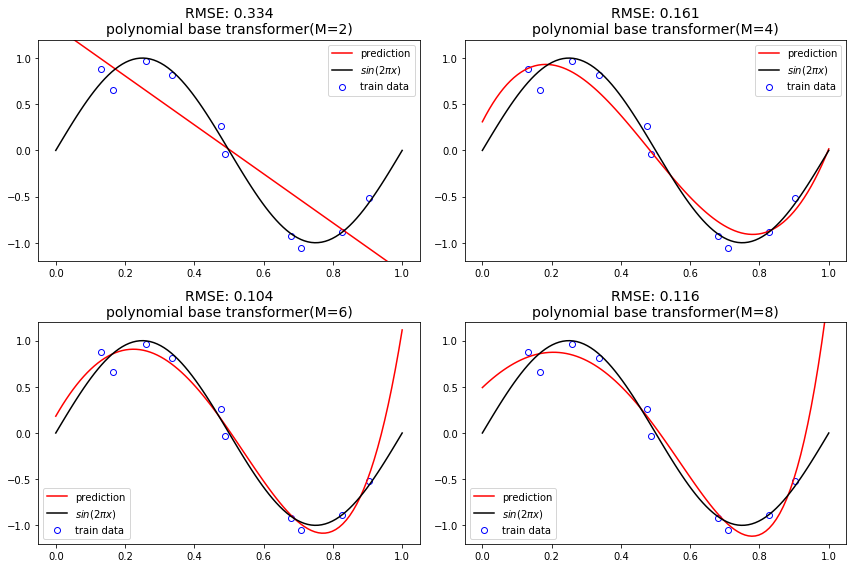

In [15]:
fig=plt.figure(figsize=(12,8))
for i,M in enumerate(Ms):
    ax=fig.add_subplot(2,2,i+1)
    # Training.
    model = LinearRegressionLASSO(lambda_, basis="polynomial", exponent=range(1,M))
    model.fit(train_x,train_y)
    # Plot
    ax.plot(X, model.predict(X), color="red", label="prediction")
    ax.plot(X, Y,                color="black", label="$sin(2\pi x)$")
    ax.scatter(train_x, train_y, edgecolors='blue',facecolor="white",label="train data")
    ax.set_title(f"RMSE: {root_mean_squared_error(model.predict(train_x), train_y):.3f}\npolynomial base transformer(M={M})", fontsize=14)
    ax.set_ylim(-1.2,1.2)
    ax.legend()
plt.tight_layout()
plt.show()

In [16]:
LASSOmodel = model

### Compare weights $\mathbf{w}$

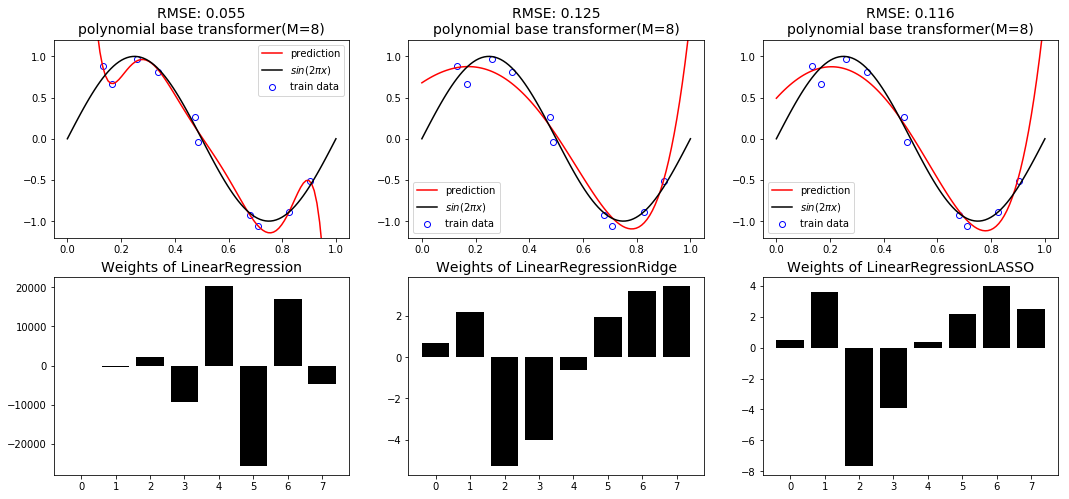

In [17]:
fig = plt.figure(figsize=(18,8))
for i,model in enumerate([Normalmodel, Ridgemodel, LASSOmodel]):
    ax = fig.add_subplot(2,3,i+4)
    ax.bar(np.arange(len(model.w)),model.w, color="black")
    ax.set_title(f"Weights of {model.__class__.__name__}", fontsize=14)
    
    ax = fig.add_subplot(2,3,i+1)
    ax.plot(X, model.predict(X),  color="red", label="prediction")
    ax.plot(X, Y,                 color="black", label="$sin(2\pi x)$")
    ax.scatter(train_x, train_y, edgecolors='blue',facecolor="white",label="train data")
    ax.set_title(f"RMSE: {root_mean_squared_error(model.predict(train_x), train_y):.3f}\npolynomial base transformer(M={M})", fontsize=14)
    ax.set_ylim(-1.2,1.2)
    ax.legend()

## BayesianLinearRegression

In [18]:
from kerasy.ML.linear import BayesianLinearRegression

In [19]:
alpha = 1
beta = 25

In [20]:
N = 25
M = 25
train_x, train_y = generateSin(N, xmin=xmin, xmax=xmax, seed=seed)
random_idx = np.random.RandomState(seed).choice(N, N)

In [21]:
mus = np.linspace(xmin,xmax,M)
sigma = 0.1

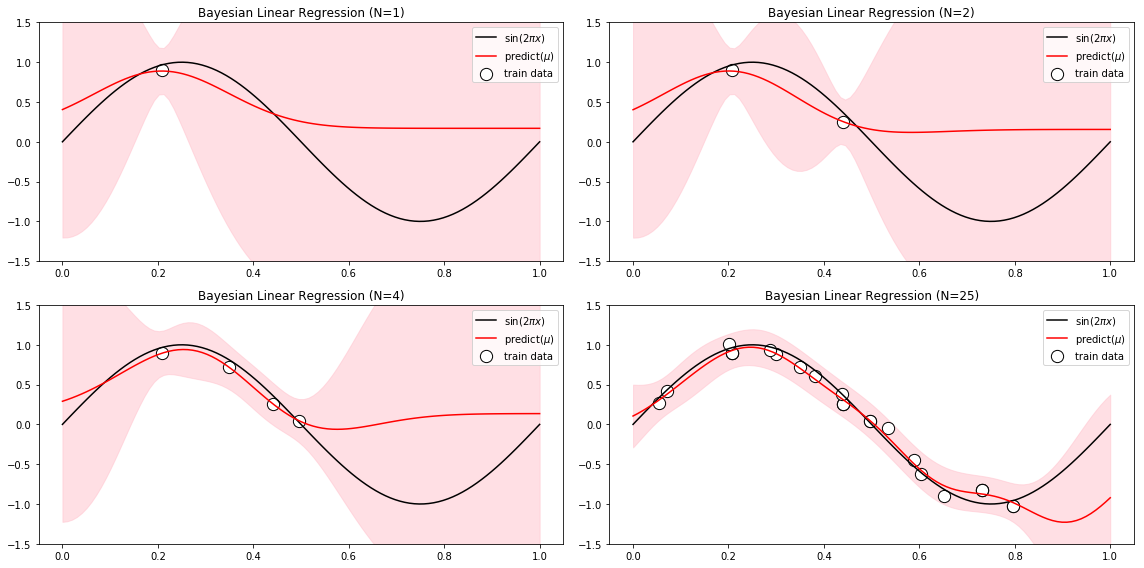

In [22]:
fig = plt.figure(figsize=(16,8))

for i,n in enumerate([1,2,4,25]):
    ax = fig.add_subplot(2,2,i+1)
    model = BayesianLinearRegression(alpha=alpha, beta=beta, basis="gaussian", mu=mus, sigma=sigma)
    model.fit(train_x[random_idx[:n]],train_y[random_idx[:n]])
    y_pred, y_std = model.predict(X)
    ax.plot(X, Y, color="black", label="$\sin(2\pi x)$")
    ax.plot(X, y_pred, color="red", label="predict($\mu$)")
    ax.fill_between(X, y_pred-y_std, y_pred+y_std, color="pink", alpha=0.5)
    ax.scatter(train_x[random_idx[:n]], train_y[random_idx[:n]],s=150,edgecolors='black',facecolor="white",label="train data")
    ax.set_ylim(-1.5,1.5), ax.legend(), ax.set_title(f"Bayesian Linear Regression (N={n})")
plt.tight_layout()
plt.show()

## Evidence Approximation Bayesian Regression

In [23]:
from kerasy.ML.linear import EvidenceApproxBayesianRegression

In [24]:
alpha = 100
beta = 100

In [25]:
N = 25
Ms = np.arange(2,10)
rnd = np.random.RandomState(seed)
train_x, train_y = generateSin(N, xmin=xmin, xmax=xmax, seed=rnd)
random_idx = rnd.choice(N, N)

In [26]:
evidences = []
history = []
for M in Ms:
    model = EvidenceApproxBayesianRegression(alpha=alpha, beta=beta, basis="polynomial", exponent=range(M))
    model.fit(train_x, train_y)
    evidences.append(model.evidence(train_x, train_y))
    history.append(model)
best_M = Ms[np.argmax(evidences)]
best_model = history[np.argmax(evidences)]

Search for Hyper Parameters (alpha, beta) 012/100 [##------------------]  12.00% - 0.004s  

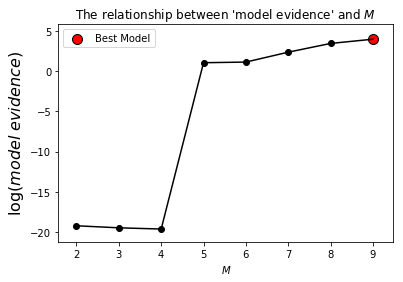

In [27]:
plt.plot(Ms, evidences, color="black")
plt.scatter(Ms, evidences, color="black")
plt.scatter(best_M, np.max(evidences), edgecolors='black',facecolor="red", s=100, label="Best Model")
plt.title("The relationship between 'model evidence' and $M$"),
plt.xlabel("$M$"), plt.ylabel("$\log({model\ evidence})$", fontsize=16), plt.legend()
plt.show()

In [28]:
print("[Best Parameter]")
print(f"M     = {best_M}")
print(f"alpha = {best_model.alpha}")
print(f"beta  = {best_model.beta}")

[Best Parameter]
M     = 9
alpha = 0.0077885261693389505
beta  = 149.54939258510822


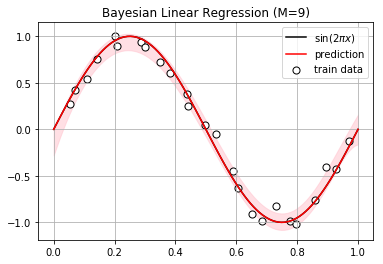

In [29]:
y_pred, y_std = best_model.predict(X)
plt.plot(X, Y,color="black", label="$\sin(2\pi x)$")
plt.plot(X, Y,color="red", label="prediction")
plt.fill_between(X, y_pred-y_std, y_pred+y_std, color="pink", alpha=0.5)
plt.scatter(train_x,train_y,s=50,edgecolors='black',facecolor="white",label="train data")
plt.title(f"Bayesian Linear Regression (M={best_M})")
plt.legend(), plt.grid()
plt.show()